<a href="https://colab.research.google.com/github/obaileyw-uncc/ecgr5105/blob/main/hw01_gradientdescent/hw01_gradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECGR 5105 Homework 1: Gradient Descent
**Owen Bailey-Waltz (801488178)**

In [92]:
# import required packages, load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display

drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/datasets/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Problem 1: Linear regression, one explanatory variable

In [93]:
# assign the arrays used in single-variable fitting
X_1 = df.values[:, 0]
X_2 = df.values[:, 1]
X_3 = df.values[:, 2]
Y = df.values[:, 3]

### Functions for single-variable gradient descent
The following functions are generic implementations of a single-variable gradient descent algorithm and loss computation designed for use with input arrays rather than matrices. The matrix implementations are featured in Problem 2 alongside the multi-variable implementation.

In [94]:
# functions for single-variable gradient descent
def compute_loss_single(X, y, theta):
  H = theta[1] * X + theta[0]
  sq_err = np.square(np.subtract(H, y))
  J = (1 / (2 * len(X))) * np.sum(sq_err)
  return J

def grad_desc_single(X, y, theta, alpha, N):
  m = len(y)
  loss_history = np.zeros(N)

  for i in range(N):
    H = theta[1] * X + theta[0]
    err = np.subtract(H, y)
    inc = [0, 0]
    inc[0] = (alpha / m) * sum(err)
    inc[1] = (alpha / m) * X.dot(err)
    theta[0] -= inc[0]
    theta[1] -= inc[1]
    loss_history[i] = compute_loss_single(X, y, theta)

  return theta, loss_history

### Y vs X<sub>1</sub>


#### Low learning rate ($\alpha\ = 0.01$)

Final value of parameters: [np.float64(5.858868600540576), np.float64(-2.0114502251726236)]
Loss history: [5.48226715 5.44290965 5.40604087 ... 0.98560732 0.9856046  0.9856019 ]


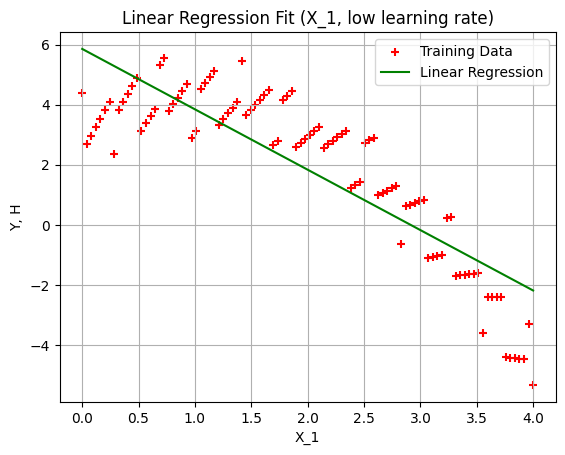

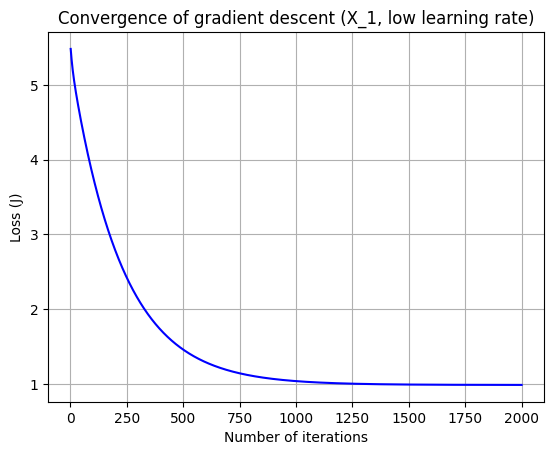

In [95]:
alpha = 0.01
theta = [0, 0]
N = 2000

# compute loss
J_1 = compute_loss_single(X_1, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_1, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_1, Y, color='red', marker='+', label='Training Data')
plt.plot(X_1, theta[1] * X_1 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_1, low learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_1, low learning rate)')
plt.show()


#### Medium learning rate ($\alpha\ = 0.05$)

Final value of parameters: [np.float64(5.927864277730485), np.float64(-2.0383036912064445)]
Loss history: [5.32852962 5.18676104 5.07204859 4.97135951 4.87841102 4.7901631
 4.70513385 4.6225903  4.54215964 4.46364257 4.38692354 4.31192769
 4.23860012 4.16689592 4.09677542 4.02820186 3.96114022 3.89555678
 3.83141873 3.76869415 3.70735181 3.64736126 3.58869268 3.53131694
 3.47520555 3.42033064 3.36666497 3.31418189 3.26285534 3.21265983
 3.16357044 3.1155628  3.06861307 3.02269793 2.97779459 2.93388074
 2.8909346  2.84893482 2.80786057 2.76769143 2.72840747 2.68998918
 2.65241749 2.61567373 2.57973967 2.54459746 2.51022965 2.47661918
 2.44374936 2.41160386 2.38016673 2.34942236 2.31935548 2.28995115
 2.26119479 2.23307211 2.20556915 2.17867225 2.15236805 2.1266435
 2.10148583 2.07688253 2.0528214  2.02929048 2.0062781  1.98377283
 1.96176348 1.94023914 1.91918911 1.89860295 1.87847043 1.85878155
 1.83952654 1.82069584 1.8022801  1.78427017 1.76665712 1.74943218
 1.73258682 1.71611267 1.

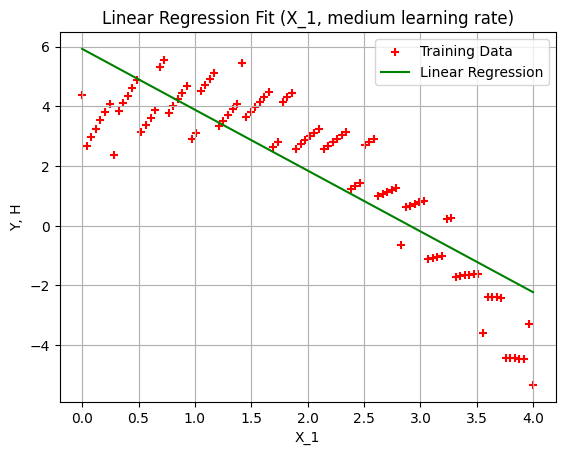

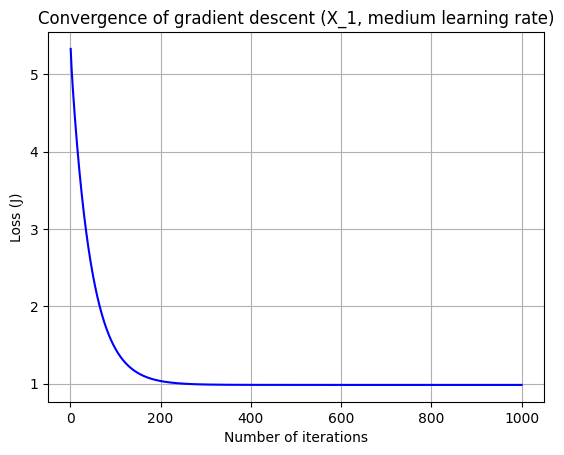

In [96]:
alpha = 0.05
theta = [0, 0]
N = 1000

# compute loss
J_1 = compute_loss_single(X_1, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_1, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_1, Y, color='red', marker='+', label='Training Data')
plt.plot(X_1, theta[1] * X_1 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_1, medium learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_1, medium learning rate)')
plt.show()

#### High learning rate ($\alpha\ = 0.1$)

Final value of parameters: [np.float64(5.927869426861156), np.float64(-2.038305695274108)]
Loss history: [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.1

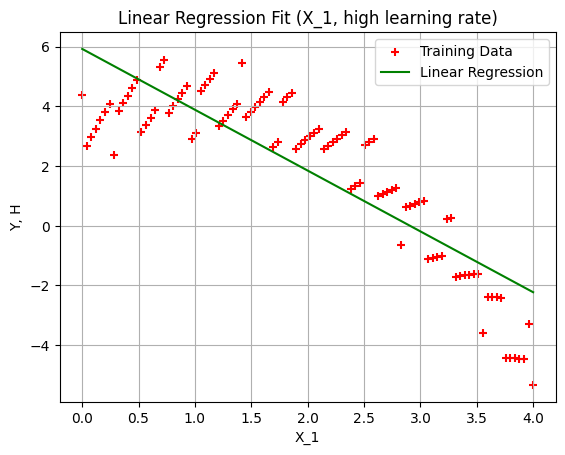

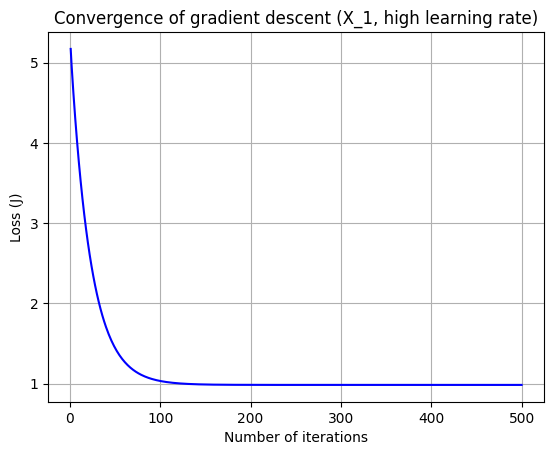

In [97]:
alpha = 0.1
theta = [0, 0]
N = 500

# compute loss
J_1 = compute_loss_single(X_1, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_1, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_1, Y, color='red', marker='+', label='Training Data')
plt.plot(X_1, theta[1] * X_1 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_1, high learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_1, high learning rate)')
plt.show()

### Y vs X<sub>2</sub>


#### Low learning rate ($\alpha\ = 0.01$)

Final value of parameters: [np.float64(0.7307249777814308), np.float64(0.5596842180080547)]
Loss history: [5.29831663 5.09909109 4.92356115 ... 3.59936968 3.59936967 3.59936965]


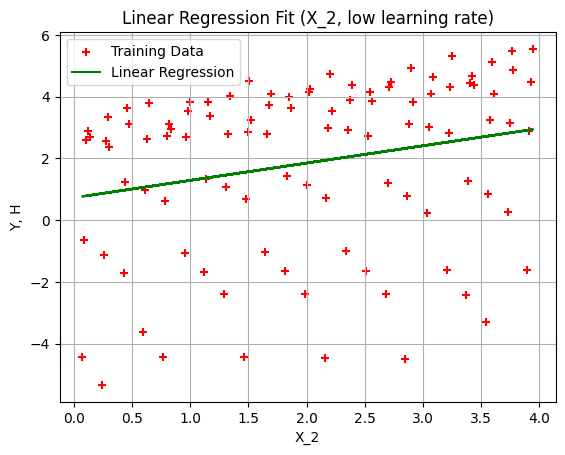

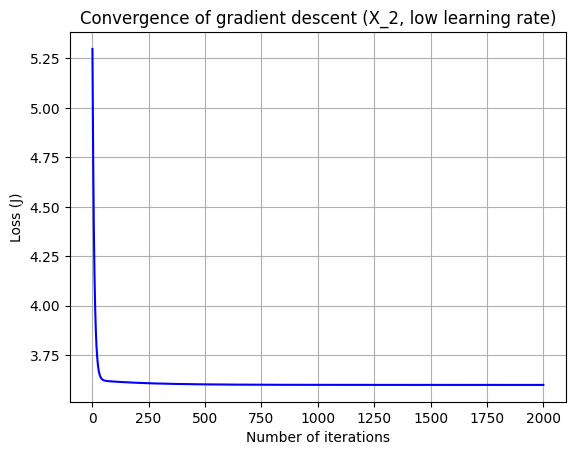

In [106]:
alpha = 0.01
theta = [0, 0]
N = 2000

# compute loss
J_2 = compute_loss_single(X_2, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_2, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_2, Y, color='red', marker='+', label='Training Data')
plt.plot(X_2, theta[1] * X_2 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_2')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_2, low learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_2, low learning rate)')
plt.show()


#### Medium learning rate ($\alpha\ = 0.05$)

Final value of parameters: [np.float64(0.7343436185963006), np.float64(0.5582758093391138)]
Loss history: [4.5369622  4.06234927 3.83409365 3.72418051 3.6711185  3.64537047
 3.6327483  3.62643665 3.62316171 3.6213508  3.62024836 3.61949136
 3.6189053  3.61840625 3.61795379 3.6175284  3.61712059 3.61672572
 3.61634144 3.61596654 3.61560033 3.61524241 3.61489247 3.6145503
 3.61421568 3.61388846 3.61356844 3.61325548 3.61294942 3.61265011
 3.61235739 3.61207112 3.61179116 3.61151736 3.6112496  3.61098774
 3.61073165 3.61048121 3.61023628 3.60999675 3.6097625  3.60953341
 3.60930936 3.60909026 3.60887598 3.60866643 3.60846149 3.60826107
 3.60806506 3.60787337 3.60768591 3.60750258 3.60732329 3.60714794
 3.60697647 3.60680877 3.60664476 3.60648437 3.60632752 3.60617412
 3.6060241  3.60587739 3.6057339  3.60559359 3.60545636 3.60532216
 3.60519091 3.60506256 3.60493703 3.60481427 3.60469422 3.60457681
 3.60446199 3.60434969 3.60423988 3.60413248 3.60402745 3.60392473
 3.60382428 3.60372604 3

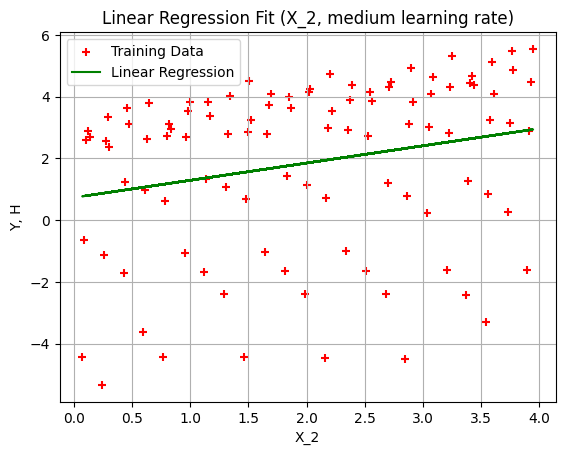

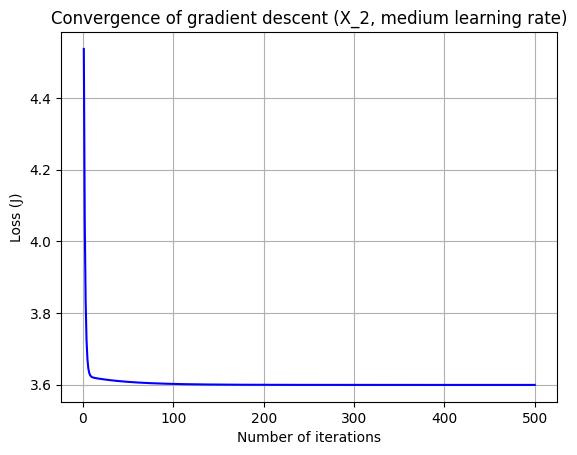

In [99]:
alpha = 0.05
theta = [0, 0]
N = 500

# compute loss
J_2 = compute_loss_single(X_2, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_2, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_2, Y, color='red', marker='+', label='Training Data')
plt.plot(X_2, theta[1] * X_2 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_2')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_2, medium learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_2, medium learning rate)')
plt.show()


#### High learning rate ($\alpha\ = 0.1$)

Final value of parameters: [np.float64(0.7360542889293448), np.float64(0.5576100005313264)]
Loss history: [3.90731819 3.66528504 3.62832072 3.62197105 3.62022283 3.61919582
 3.61830993 3.6174772  3.6166831  3.61592412 3.61519844 3.61450458
 3.61384113 3.61320675 3.61260018 3.61202019 3.61146562 3.61093535
 3.61042832 3.60994351 3.60947995 3.6090367  3.60861288 3.60820763
 3.60782015 3.60744964 3.60709538 3.60675663 3.60643274 3.60612304
 3.60582691 3.60554376 3.60527302 3.60501414 3.60476661 3.60452993
 3.60430362 3.60408723 3.60388032 3.60368248 3.60349331 3.60331243
 3.60313948 3.6029741  3.60281598 3.60266478 3.60252021 3.60238198
 3.6022498  3.60212342 3.60200258 3.60188703 3.60177654 3.6016709
 3.60156989 3.60147331 3.60138095 3.60129265 3.60120821 3.60112748
 3.60105028 3.60097647 3.60090589 3.6008384  3.60077388 3.60071218
 3.60065318 3.60059677 3.60054283 3.60049126 3.60044194 3.60039479
 3.60034971 3.60030659 3.60026537 3.60022596 3.60018827 3.60015224
 3.60011778 3.60008483 3

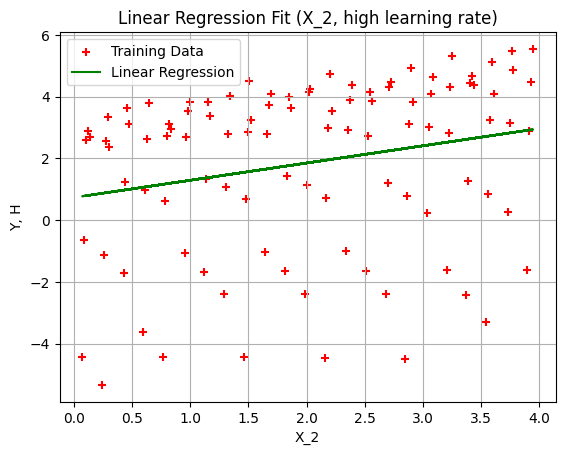

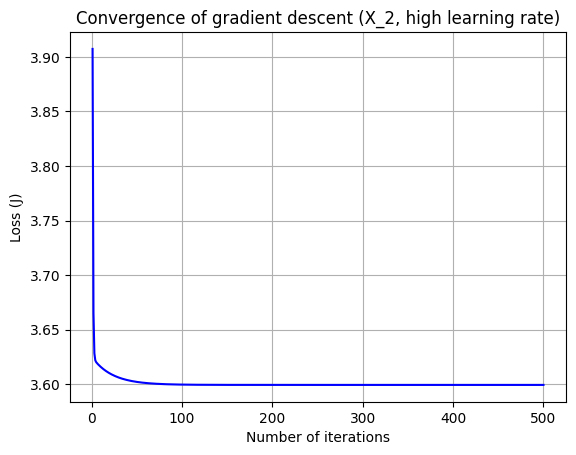

In [100]:
alpha = 0.1
theta = [0, 0]
N = 500

# compute loss
J_2 = compute_loss_single(X_2, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_2, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_2, Y, color='red', marker='+', label='Training Data')
plt.plot(X_2, theta[1] * X_2 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_2')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_2, high learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_2, high learning rate)')
plt.show()


### Y vs X<sub>3</sub>


#### Low learning rate ($\alpha\ = 0.01$)

Final value of parameters: [np.float64(2.861845085919815), np.float64(-0.5166952280692757)]
Loss history: [5.40768785 5.30397076 5.21178297 ... 3.62946316 3.6294631  3.62946305]


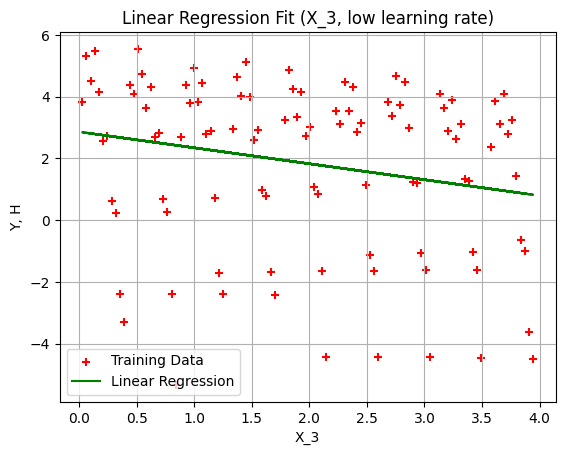

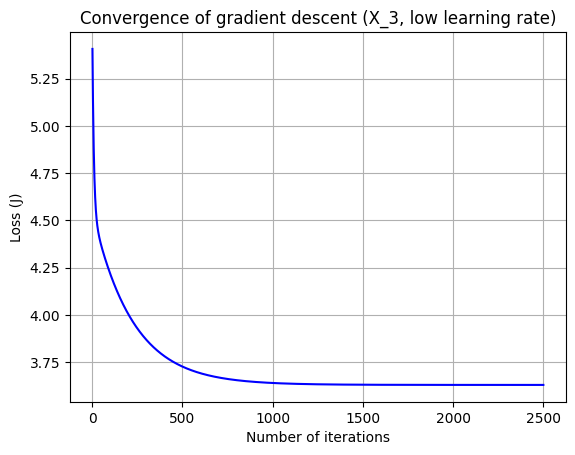

In [107]:
alpha = 0.01
theta = [0, 0]
N = 2500

# compute loss
J_3 = compute_loss_single(X_3, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_3, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_3, Y, color='red', marker='+', label='Training Data')
plt.plot(X_3, theta[1] * X_3 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_3')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_3, low learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_3, low learning rate)')
plt.show()


#### Medium learning rate ($\alpha\ = 0.05$)

Final value of parameters: [np.float64(2.8713893505679553), np.float64(-0.5204699305084967)]
Loss history: [5.00990921 4.74622414 4.60645259 4.52800041 4.47999774 4.44721795
 4.4221482  4.40107934 4.38217799 4.36453573 4.34770038 4.33144481
 4.31565296 4.30026361 4.28524271 4.27056965 4.25623056 4.24221497
 4.22851417 4.21512038 4.20202638 4.1892253  4.17671049 4.16447551
 4.15251409 4.1408201  4.12938755 4.1182106  4.10728353 4.09660075
 4.08615681 4.07594636 4.06596418 4.05620517 4.04666434 4.03733681
 4.02821782 4.01930269 4.01058688 4.00206593 3.99373548 3.98559126
 3.97762913 3.96984501 3.96223491 3.95479495 3.94752132 3.94041031
 3.93345827 3.92666166 3.920017   3.9135209  3.90717002 3.90096113
 3.89489106 3.88895668 3.88315499 3.87748299 3.87193781 3.8665166
 3.86121659 3.85603507 3.85096939 3.84601696 3.84117525 3.83644179
 3.83181416 3.82728998 3.82286695 3.8185428  3.81431533 3.81018236
 3.8061418  3.80219157 3.79832966 3.79455409 3.79086292 3.78725428
 3.78372632 3.78027723 

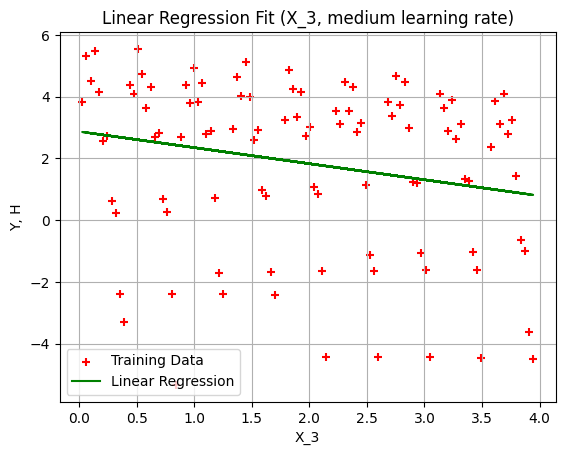

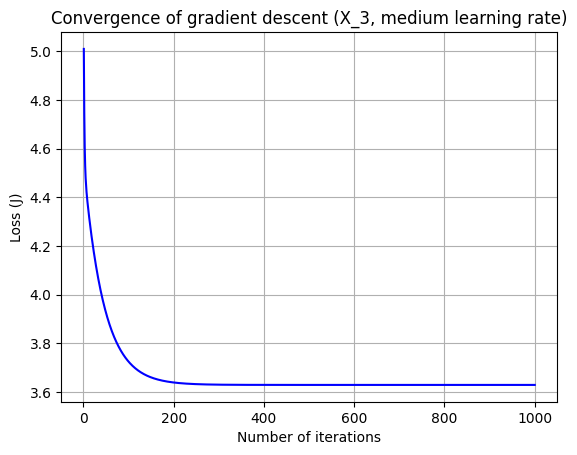

In [102]:
alpha = 0.05
theta = [0, 0]
N = 1000

# compute loss
J_3 = compute_loss_single(X_3, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_3, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_3, Y, color='red', marker='+', label='Training Data')
plt.plot(X_3, theta[1] * X_3 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_3')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_3, medium learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_3, medium learning rate)')
plt.show()


#### High learning rate ($\alpha\ = 0.1$)

Final value of parameters: [np.float64(2.8713914006320294), np.float64(-0.5204707412971897)]
Loss history: [4.66843939 4.49602325 4.43685075 4.39757676 4.3628731  4.3301743
 4.29900486 4.26923359 4.240788   4.21360745 4.18763542 4.16281813
 4.13910424 4.11644469 4.09479259 4.07410317 4.05433361 4.03544302
 4.01739232 4.00014417 3.98366289 3.96791437 3.95286604 3.93848678
 3.92474683 3.91161776 3.89907242 3.88708486 3.87563028 3.86468497
 3.8542263  3.84423263 3.83468329 3.82555851 3.81683943 3.80850801
 3.80054701 3.79293996 3.78567113 3.77872547 3.77208862 3.76574686
 3.75968705 3.75389666 3.74836372 3.74307678 3.7380249  3.73319763
 3.72858498 3.72417742 3.71996582 3.71594147 3.71209604 3.70842159
 3.7049105  3.70155552 3.69834971 3.69528643 3.69235934 3.6895624
 3.68688981 3.68433604 3.68189582 3.67956409 3.67733603 3.67520703
 3.67317269 3.67122879 3.66937133 3.66759645 3.66590048 3.66427991
 3.6627314  3.66125173 3.65983785 3.65848684 3.65719589 3.65596234
 3.65478363 3.65365733 3

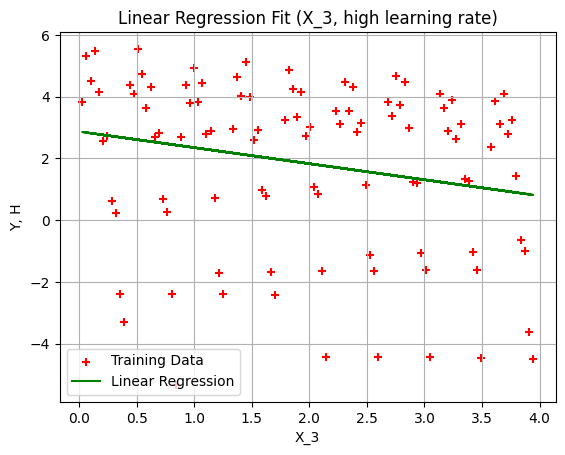

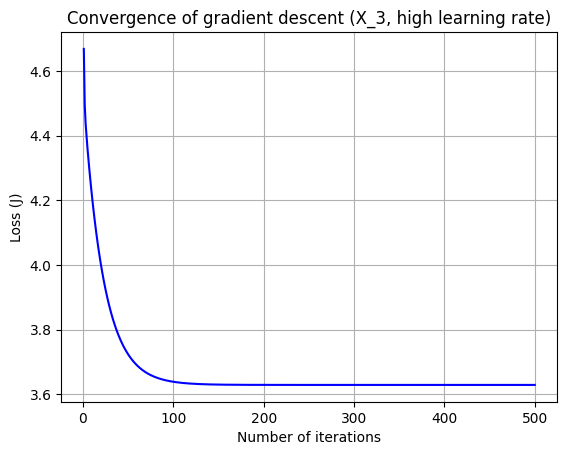

In [103]:
alpha = 0.1
theta = [0, 0]
N = 500

# compute loss
J_3 = compute_loss_single(X_3, Y, theta)

# minimize loss and print new parameters
theta, loss_history = grad_desc_single(X_3, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the linear regression fit and the loss over time
plt.scatter(X_3, Y, color='red', marker='+', label='Training Data')
plt.plot(X_3, theta[1] * X_3 + theta[0], color='green',
         label='Linear Regression')
plt.grid(True)
plt.xlabel('X_3')
plt.ylabel('Y, H')
plt.title('Linear Regression Fit (X_3, high learning rate)')
plt.legend()
plt.show()

plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X_3, high learning rate)')
plt.show()

## Problem 2: Linear regression, multiple explanatory variables

In [112]:
# assign the array used in multi-variable fitting (reshape existing arrays and
# horizontally stack them into our input matrix)
X_0 = np.ones((len(Y), 1))
X = np.hstack((X_0, X_1.reshape(len(X_1), 1), X_2.reshape(len(X_2), 1),
               X_3.reshape(len(X_3), 1)))

### Functions for multi-variable gradient descent
The following functions are generic implementations of a multi-variable gradient descent algorithm and loss computation.

In [113]:
def compute_loss(X, y, theta):
  H = X.dot(theta)
  sq_err = np.square(np.subtract(H, y))
  J = (1 / (2 * len(X))) * np.sum(sq_err)
  return J

def grad_desc(X, y, theta, alpha, N):
  m = len(y)
  loss_history = np.zeros(N)

  for i in range(N):
    H = X.dot(theta)
    err = np.subtract(H, y)
    inc = (alpha / m) * X.transpose().dot(err)
    theta -= inc
    loss_history[i] = compute_loss(X, y, theta)

  return theta, loss_history

### Multi-variable gradient descent implementation at several learning rates

#### Main submission model ($\alpha=0.08$, n = 2000)

Final value of parameters: [ 5.3141666  -2.00371919  0.53256343 -0.26560178]
Loss history: [4.10782641 3.67807605 3.34391141 ... 0.73846424 0.73846424 0.73846424]


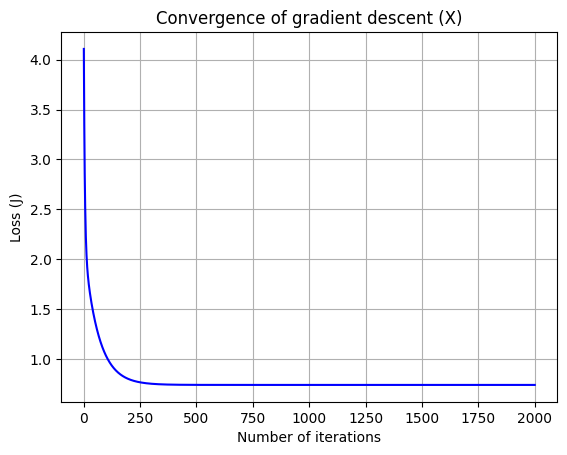

Predictions for training set inputs (4, 0.24, 0.84) (2.707070707, 2.001616162, 2.488484848) & (1.01010101, 0.813737374, 3.652121212)
-2.7960004258807656 0.2949986427913852 2.753564690826601
Training set -5.332454989 1.139717238 3.110675304

Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)
3.5774090589936436 0.24432109722649975 0.10253411574010246


In [182]:
alpha = 0.08
theta = np.zeros(4)
N = 2000

# minimize loss and print new parameters
theta, loss_history = grad_desc(X, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the loss over time
plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X)')
plt.show()

# three training set points picked randomly, then predict some values
foo = np.array([1, 4, 0.24, 0.84]).transpose().dot(theta)
boo = np.array([1, 2.707070707, 2.001616162, 2.488484848]).transpose().dot(theta)
soo = np.array([1, 1.01010101, 0.813737374, 3.652121212]).transpose().dot(theta)
print("Predictions for training set inputs (4, 0.24, 0.84)"
      + " (2.707070707, 2.001616162, 2.488484848) & "
      + "(1.01010101, 0.813737374, 3.652121212)")
print("{} {} {}".format(foo, boo, soo))
print("Training set -5.332454989 1.139717238 3.110675304")
print()

foo = np.array([1, 1, 1, 1]).transpose().dot(theta)
boo = np.array([1, 2, 0, 4]).transpose().dot(theta)
soo = np.array([1, 3, 2, 1]).transpose().dot(theta)
print("Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)")
print("{} {} {}".format(foo, boo, soo))

#### Low learning rate ($\alpha=0.01$)

Final value of parameters: [ 4.60784132 -1.90393905  0.64927931 -0.16206885]
Loss history: [5.21542243 4.97171977 4.7765543  ... 0.76514569 0.76509252 0.76503946]


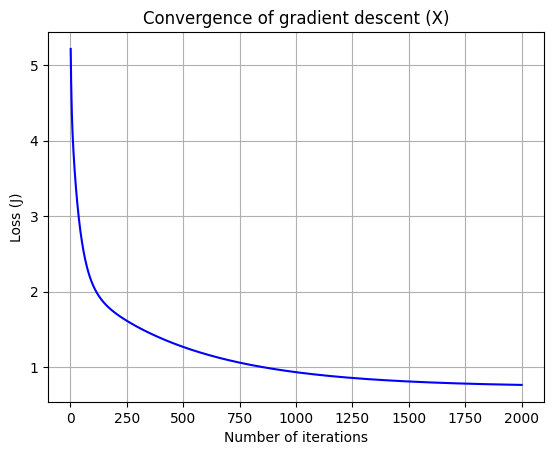

Predictions for training set inputs (4, 0.24, 0.84) (2.707070707, 2.001616162, 2.488484848) & (1.01010101, 0.813737374, 3.652121212)
-2.9882256930544124 0.35004576276776844 2.621118312084609
Training set -5.332454989 1.139717238 3.110675304

Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)
3.1911127254543454 0.15168781022234323 0.03251393005171718


In [174]:
alpha = 0.01
theta = np.zeros(4)
N = 2000

# minimize loss and print new parameters
theta, loss_history = grad_desc(X, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the loss over time
plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X)')
plt.show()

# three training set points picked randomly, then predict some values
foo = np.array([1, 4, 0.24, 0.84]).transpose().dot(theta)
boo = np.array([1, 2.707070707, 2.001616162, 2.488484848]).transpose().dot(theta)
soo = np.array([1, 1.01010101, 0.813737374, 3.652121212]).transpose().dot(theta)
print("Predictions for training set inputs (4, 0.24, 0.84)"
      + " (2.707070707, 2.001616162, 2.488484848) & "
      + "(1.01010101, 0.813737374, 3.652121212)")
print("{} {} {}".format(foo, boo, soo))
print("Training set -5.332454989 1.139717238 3.110675304")
print()

foo = np.array([1, 1, 1, 1]).transpose().dot(theta)
boo = np.array([1, 2, 0, 4]).transpose().dot(theta)
soo = np.array([1, 3, 2, 1]).transpose().dot(theta)
print("Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)")
print("{} {} {}".format(foo, boo, soo))

#### High learning rate ($\alpha=0.1$)

Final value of parameters: [ 5.31416716 -2.00371927  0.53256334 -0.26560186]
Loss history: [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


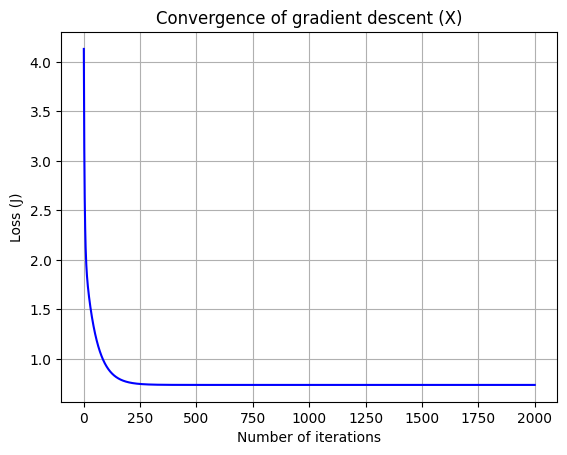

Predictions for training set inputs (4, 0.24, 0.84) (2.707070707, 2.001616162, 2.488484848) & (1.01010101, 0.813737374, 3.652121212)
-2.796000271789023 0.294998598664478 2.7535647969983517
Training set -5.332454989 1.139717238 3.110675304

Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)
3.5774093686567574 0.24432117148325472 0.10253417186972863


In [175]:
alpha = 0.1
theta = np.zeros(4)
N = 2000

# minimize loss and print new parameters
theta, loss_history = grad_desc(X, Y, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Loss history: {}".format(loss_history))

# plot the loss over time
plt.plot(range(1, N + 1), loss_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X)')
plt.show()

# three training set points picked randomly, then predict some values
foo = np.array([1, 4, 0.24, 0.84]).transpose().dot(theta)
boo = np.array([1, 2.707070707, 2.001616162, 2.488484848]).transpose().dot(theta)
soo = np.array([1, 1.01010101, 0.813737374, 3.652121212]).transpose().dot(theta)
print("Predictions for training set inputs (4, 0.24, 0.84)"
      + " (2.707070707, 2.001616162, 2.488484848) & "
      + "(1.01010101, 0.813737374, 3.652121212)")
print("{} {} {}".format(foo, boo, soo))
print("Training set -5.332454989 1.139717238 3.110675304")
print()

foo = np.array([1, 1, 1, 1]).transpose().dot(theta)
boo = np.array([1, 2, 0, 4]).transpose().dot(theta)
soo = np.array([1, 3, 2, 1]).transpose().dot(theta)
print("Predictions for inputs (1, 1, 1) (2, 0, 4) & (3, 2, 1)")
print("{} {} {}".format(foo, boo, soo))